In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

In [2]:
# loader function
def load_training_and_test_data(datasetName):
    
    npzfile = np.load("./data/datasets/" + datasetName + "_training_data.npz")
    train = npzfile["arr_0"]
    
    npzfile = np.load("./data/datasets/" + datasetName + "_training_labels.npz")
    train_labels = npzfile["arr_0"]
    
    npzfile = np.load("./data/datasets/" + datasetName + "_test_data.npz")
    test = npzfile["arr_0"]
    
    npzfile = np.load("./data/datasets/" + datasetName + "_test_labels.npz")
    test_labels = npzfile["arr_0"]
    
    return (train, train_labels), (test, test_labels)

### divide the dataset into train and test

In [3]:
(X_train, y_train), (X_test, y_test) = load_training_and_test_data("cats_vs_dogs")

type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [4]:
X_train.shape, y_train.shape

((2000, 150, 150, 3), (2000,))

In [5]:
X_test.shape, y_test.shape

((998, 150, 150, 3), (998,))

#### number of classes

In [34]:
K = len(np.unique(y_train))
print(f"number of classes: {K}")

number of classes: 2


**classes:**

|label|class|
|-|-|
|0|Cat|
|1|Dog|

In [10]:
X_train[0].ndim, y_train[0].ndim

(3, 0)

In [11]:
X_train[0].shape, y_train[0].shape

((150, 150, 3), ())

**obseravtion:** target data should be 1D. So we need to reshape the data

In [12]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

In [47]:
y_train[0].ndim, y_train.shape

In [18]:
X_train.dtype

dtype('uint8')

**obseravtion:** change our image type to `float32`

In [19]:
X_train = X_train.astype(dtype="float32")
X_test = X_test.astype(dtype="float32")
X_train.dtype

dtype('float32')

#### Normalize our data from (0 to 255) to (0 to 1)

In [20]:
X_train, X_test = X_train/255.0, X_test/255.0

#### Draw some images

In [21]:
classes = ["Cat", "Dog"]

In [30]:
y_train = y_train.flatten()
y_train.shape

(2000,)

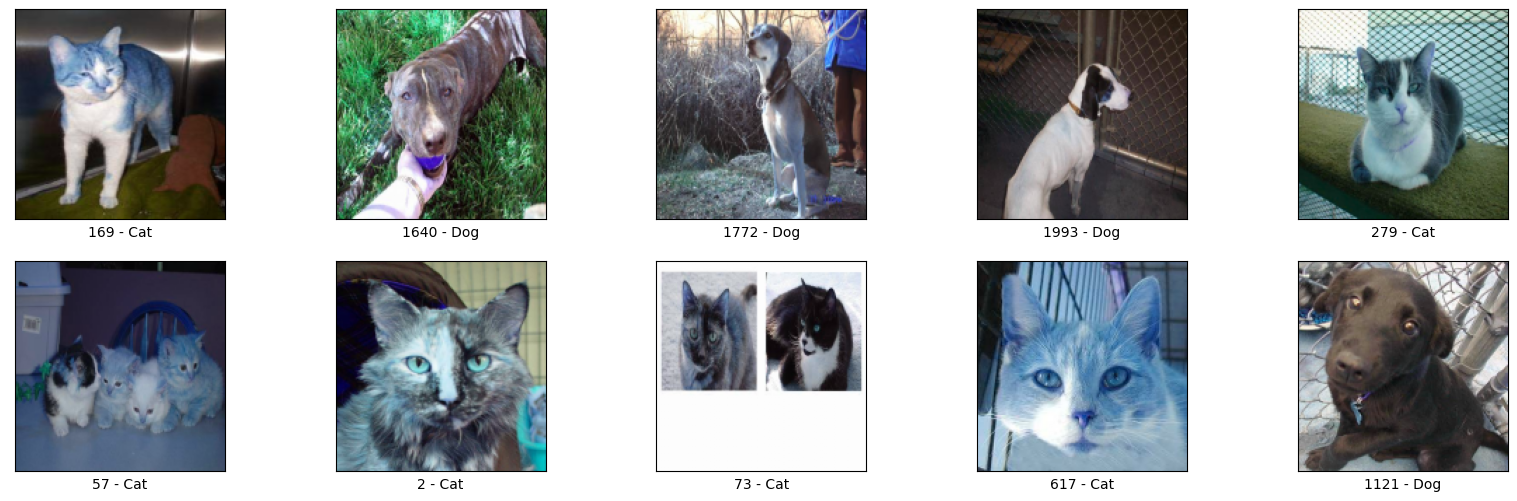

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 6))

for _, axi in enumerate(ax.flat):
    idx = np.random.choice(range(X_train.shape[0]))
    axi.imshow(X_train[idx])
    axi.set(xlabel=f"{idx} - {classes[y_train[idx]]}")
    axi.set(xticks=[], yticks=[]);

In [32]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [35]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [36]:
%%time
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 2000 samples, validate on 998 samples
Epoch 1/15
2000/2000 [==============================] - 98s 49ms/sample - loss: 0.7528 - accuracy: 0.5060 - val_loss: 0.6935 - val_accuracy: 0.5050
Epoch 2/15
2000/2000 [==============================] - 44s 22ms/sample - loss: 0.6937 - accuracy: 0.5390 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 3/15
2000/2000 [==============================] - 41s 20ms/sample - loss: 0.6908 - accuracy: 0.5580 - val_loss: 0.7071 - val_accuracy: 0.4980
Epoch 4/15
2000/2000 [==============================] - 42s 21ms/sample - loss: 0.6740 - accuracy: 0.5935 - val_loss: 0.6647 - val_accuracy: 0.6222
Epoch 5/15
2000/2000 [==============================] - 42s 21ms/sample - loss: 0.6423 - accuracy: 0.6310 - val_loss: 0.6670 - val_accuracy: 0.5992
Epoch 6/15
2000/2000 [==============================] - 41s 20ms/sample - loss: 0.6161 - accuracy: 0.6610 - val_loss: 0.6457 - val_accuracy: 0.6533
Epoch 7/15
2000/2000 [==============================] - 43s 21ms/

In [37]:
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3, 3), activation="relu")(i)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, (3, 3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [38]:
%%time
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 2000 samples, validate on 998 samples
Epoch 1/15
2000/2000 [==============================] - 81s 41ms/sample - loss: 0.6958 - accuracy: 0.5305 - val_loss: 0.6762 - val_accuracy: 0.6232
Epoch 2/15
2000/2000 [==============================] - 81s 41ms/sample - loss: 0.6587 - accuracy: 0.6055 - val_loss: 0.6604 - val_accuracy: 0.6102
Epoch 3/15
2000/2000 [==============================] - 78s 39ms/sample - loss: 0.6453 - accuracy: 0.6280 - val_loss: 0.6496 - val_accuracy: 0.6333
Epoch 4/15
2000/2000 [==============================] - 74s 37ms/sample - loss: 0.6178 - accuracy: 0.6630 - val_loss: 0.6158 - val_accuracy: 0.6713
Epoch 5/15
2000/2000 [==============================] - 74s 37ms/sample - loss: 0.5740 - accuracy: 0.6980 - val_loss: 0.6119 - val_accuracy: 0.6884
Epoch 6/15
2000/2000 [==============================] - 75s 38ms/sample - loss: 0.5142 - accuracy: 0.7460 - val_loss: 0.6290 - val_accuracy: 0.6824
Epoch 7/15
2000/2000 [==============================] - 75s 38ms/

In [41]:
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3, 3), activation="relu")(i)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, (3, 3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(i, x)

In [42]:
%%time
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 2000 samples, validate on 998 samples
Epoch 1/15
2000/2000 [==============================] - 80s 40ms/sample - loss: 0.7048 - accuracy: 0.5390 - val_loss: 0.7353 - val_accuracy: 0.5000
Epoch 2/15
2000/2000 [==============================] - 75s 38ms/sample - loss: 0.6690 - accuracy: 0.5910 - val_loss: 0.6548 - val_accuracy: 0.5952
Epoch 3/15
2000/2000 [==============================] - 73s 37ms/sample - loss: 0.6086 - accuracy: 0.6650 - val_loss: 0.6231 - val_accuracy: 0.6533
Epoch 4/15
2000/2000 [==============================] - 74s 37ms/sample - loss: 0.5823 - accuracy: 0.6875 - val_loss: 0.5887 - val_accuracy: 0.6824
Epoch 5/15
2000/2000 [==============================] - 72s 36ms/sample - loss: 0.5449 - accuracy: 0.7350 - val_loss: 0.6020 - val_accuracy: 0.7024
Epoch 6/15
2000/2000 [==============================] - 72s 36ms/sample - loss: 0.5066 - accuracy: 0.7735 - val_loss: 0.5578 - val_accuracy: 0.7184
Epoch 7/15
2000/2000 [==============================] - 73s 36ms/

In [43]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0   

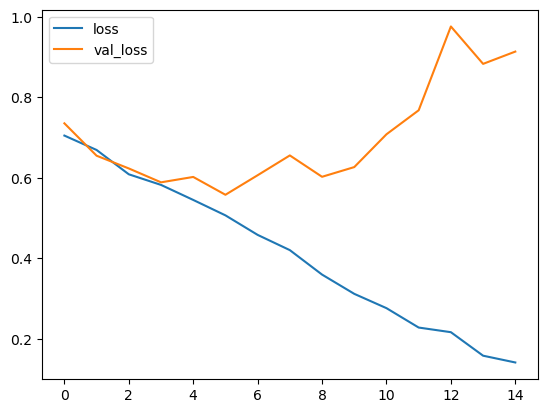

In [44]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

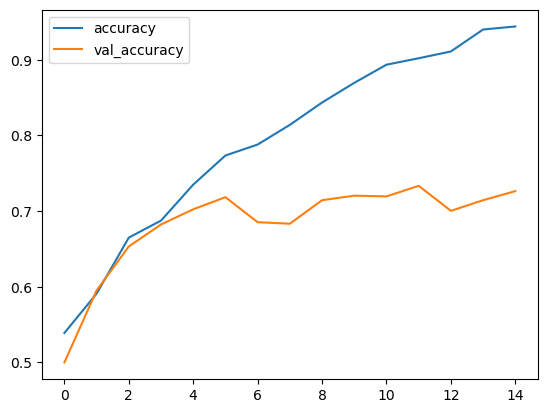

In [45]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

**observation:** It's seen from the training process that the model is stopped improved accuracy although we're feeding informations.

We need more images to train because DL needs lots of images to train

#### save the model

In [46]:
model.save("./data/models/cats_vs_dogs_V1.h5")

In [62]:
# prediction
y_pred = model.predict(X_test)
y_pred.shape

(998, 1)

In [79]:
y_pred[0]

array([0.00382328], dtype=float32)

In [84]:
int(np.rint(y_pred[700]))

1

In [94]:
y_test[0], y_pred[0]

(array([0]), array([0.00382328], dtype=float32))

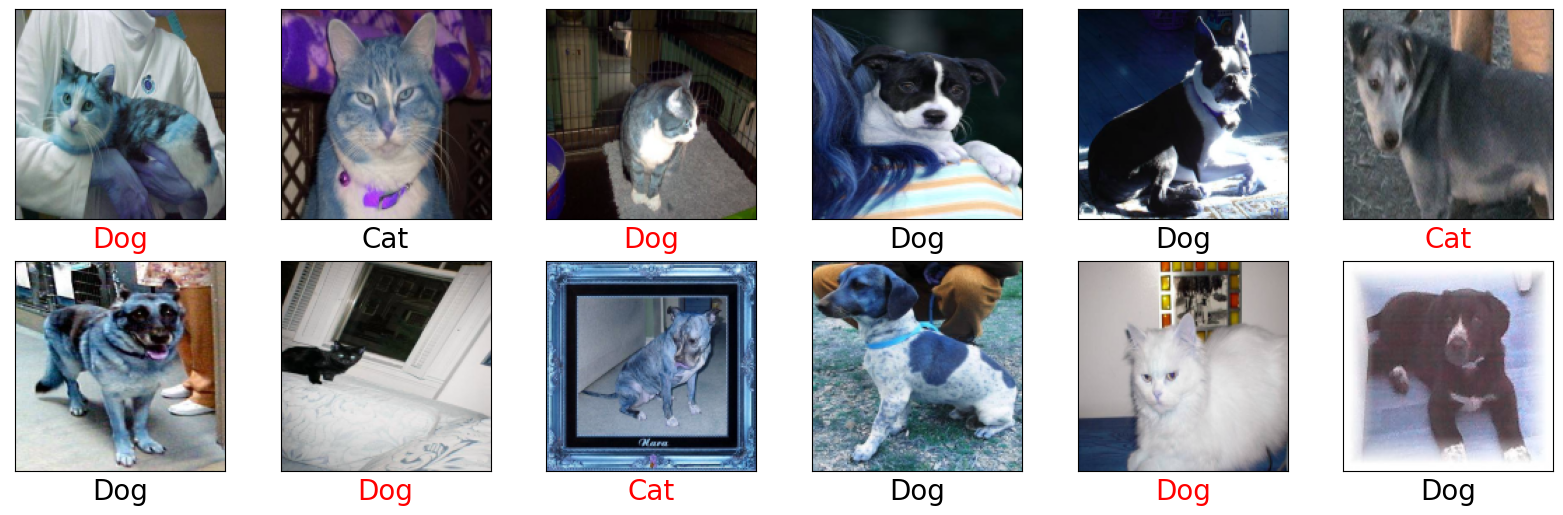

In [95]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))

for _, axi in enumerate(ax.flat):
    idx = np.random.choice(range(X_test.shape[0]))
    axi.imshow(X_test[idx])
    axi.set_xlabel(f"{classes[int(np.rint(y_pred[idx]))]}",
                   color="black" if y_test[idx] == np.rint(y_pred[idx]) else "red",
                   fontsize=20)
    axi.set(xticks=[], yticks=[]);

## Boosting accuracy with Data Augmentation

**benefits:**
- make large dataset from small data
- require much less effort in collecting data
- adding variations such as
    - rotations
    - shifts
    - zooming
    - blur etc.
- using the variations, it make our classifier much more invariant to changes in our images. Thus making it far more robust.
- reduces overfitting due to the increased variety in the training dataset

✅ Kears Data Augmentation API performs a just-in-time augmented image dataset. This means images are not created and dumped to a directory(which will be wasteful storage). Instead it generates this dataset during training process.

#### Creating our image Generator

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [100]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

#### Configuring Batch Sizes

In [ ]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(150, 150),
                                                    batch_size=batch_size,
                                                    classmode="binary")

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(150, 150),
                                                        batch_size=batch_size,
                                                        classmode="binary")

`flow_from_directory()` takes our image data and creates an iterator (a memory efficient method of returning a sequence of data).

**Note:** We can use `flow()` as well